In [56]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dense

simplefilter("ignore")  # ignore warnings to clean up output cells

In [2]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# loading the data we are going to work with
df=pd.read_csv("/kaggle/input/stock-data-sets-for-prediction/data_stocks.csv")

In [4]:
df.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [5]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


## Preprocessing

In [6]:
df.isnull().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [7]:
df.duplicated().sum()

0

## Conclusion
#### very good dataset since -> no missing valeus or dupplicate values.

In [8]:
df["DATE"].head(1)


0    1491226200
Name: DATE, dtype: int64

In [9]:
# this number 1491226200 represents the Unix timestamp,we need convert this number to datetime object
df["DATE"] = df["DATE"].apply(lambda x: datetime.datetime.fromtimestamp(x))





In [10]:
df["DATE"]

0       2017-04-03 13:30:00
1       2017-04-03 13:31:00
2       2017-04-03 13:32:00
3       2017-04-03 13:33:00
4       2017-04-03 13:34:00
                ...        
41261   2017-08-31 19:56:00
41262   2017-08-31 19:57:00
41263   2017-08-31 19:58:00
41264   2017-08-31 19:59:00
41265   2017-08-31 20:00:00
Name: DATE, Length: 41266, dtype: datetime64[ns]

In [11]:
df["DATE"].unique()

array(['2017-04-03T13:30:00.000000000', '2017-04-03T13:31:00.000000000',
       '2017-04-03T13:32:00.000000000', ...,
       '2017-08-31T19:58:00.000000000', '2017-08-31T19:59:00.000000000',
       '2017-08-31T20:00:00.000000000'], dtype='datetime64[ns]')

In [12]:
df["DATE"].min()


Timestamp('2017-04-03 13:30:00')

In [13]:
df["DATE"].max()

Timestamp('2017-08-31 20:00:00')

#### the conclusion of this date that the date start from 2017-04-03 13:30:00 and end 2017-08-31 20:00:00, i have same year but difference in month and day and time


In [14]:
#Split column DATE into year,month,day,hours,minutes,seconds
df["Year"]=df["DATE"].dt.year
df["Month"]=df["DATE"].dt.month
df["Day"]=df["DATE"].dt.day
df["Hours"]=df["DATE"].dt.hour
df["Minutes"]=df["DATE"].dt.minute
df["Seconds"]=df["DATE"].dt.second


In [15]:
#make new dataframe with column Year,Month,Day,Hours,Minutes,Seconds,sp500
new_df=df[["Year","Month","Day","Hours","Minutes","Seconds","SP500"]]

In [16]:
new_df.head(5)

,Year,Month,Day,Hours,Minutes,Seconds,SP500
0,2017,4,3,13,30,0,2363.6101
1,2017,4,3,13,31,0,2364.1001
2,2017,4,3,13,32,0,2362.6799
3,2017,4,3,13,33,0,2364.3101
4,2017,4,3,13,34,0,2364.8501


## Exploratory Data Analysis

In [17]:
# combine the year, month, day, hours, minutes, and seconds columns into a single datetime column
new_df['Datetime'] = pd.to_datetime(new_df[['Year', 'Month', 'Day', 'Hours', 'Minutes', 'Seconds']])


In [18]:
# set the datetime column as the index
new_df.set_index('Datetime', inplace=True)


In [19]:
new_df

,Year,Month,Day,Hours,Minutes,Seconds,SP500
Datetime,,,,,,,
2017-04-03 13:30:00,2017,4,3,13,30,0,2363.6101
2017-04-03 13:31:00,2017,4,3,13,31,0,2364.1001
2017-04-03 13:32:00,2017,4,3,13,32,0,2362.6799
2017-04-03 13:33:00,2017,4,3,13,33,0,2364.3101
2017-04-03 13:34:00,2017,4,3,13,34,0,2364.8501
...,...,...,...,...,...,...,...
2017-08-31 19:56:00,2017,8,31,19,56,0,2472.2200
2017-08-31 19:57:00,2017,8,31,19,57,0,2471.7700
2017-08-31 19:58:00,2017,8,31,19,58,0,2470.0300


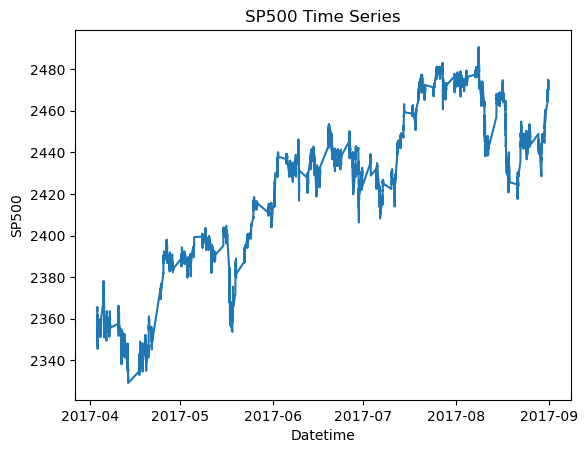

In [20]:
# plot the SP500 over time
plt.plot(new_df['SP500'])
plt.xlabel('Datetime')
plt.ylabel('SP500')
plt.title('SP500 Time Series')
plt.show()

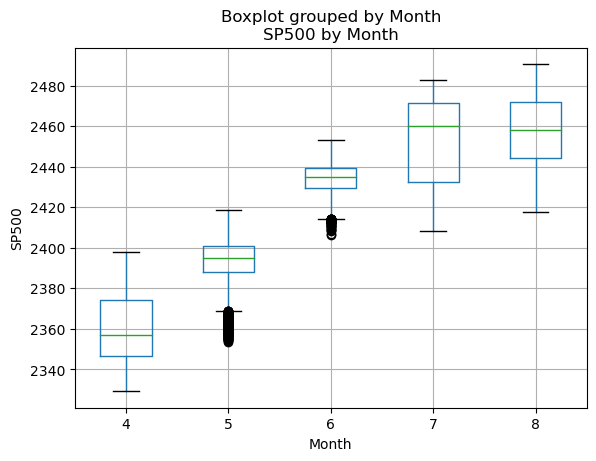

In [21]:
# plot a box plot of the SP500 by month
new_df['Month'] = new_df.index.month
new_df.boxplot(column='SP500', by='Month')
plt.xlabel('Month')
plt.ylabel('SP500')
plt.title('SP500 by Month')
plt.show()

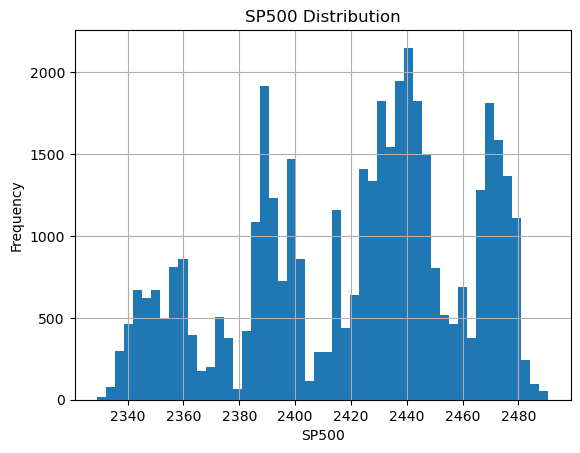

In [22]:

# plot a histogram of the SP500
new_df['SP500'].hist(bins=50)
plt.xlabel('SP500')
plt.ylabel('Frequency')
plt.title('SP500 Distribution')
plt.show()


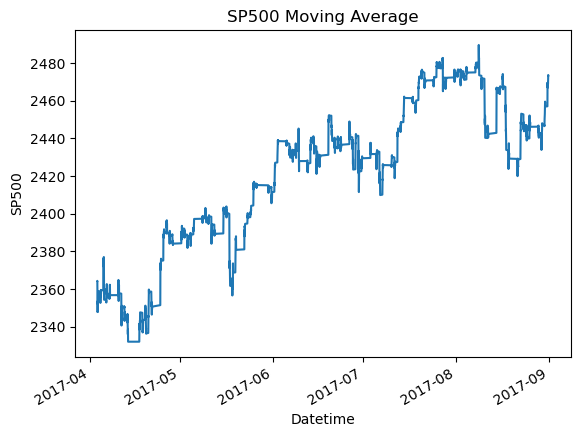

In [23]:
# plot a moving average plot of the SP500 over 30 days
new_df['SP500'].rolling(window=30).mean().plot()
plt.xlabel('Datetime')
plt.ylabel('SP500')
plt.title('SP500 Moving Average')
plt.show()

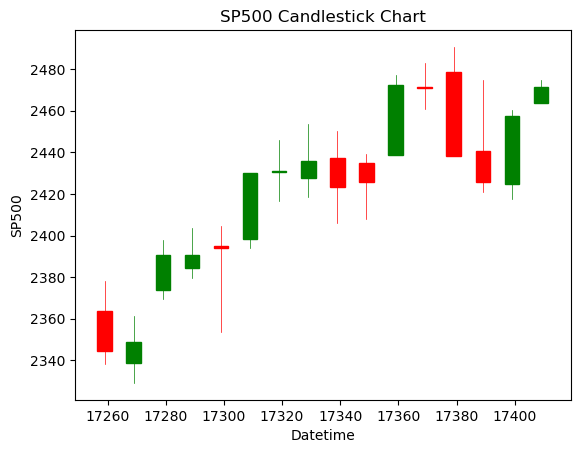

In [24]:
# plot a candlestick chart of the SP500
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

df_ohlc = new_df['SP500'].resample('10D').ohlc()
df_ohlc.reset_index(inplace=True)
df_ohlc['Datetime'] = df_ohlc['Datetime'].map(mdates.date2num)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
candlestick_ohlc(ax, df_ohlc.values, width=5, colorup='g')
plt.xlabel('Datetime')
plt.ylabel('SP500')
plt.title('SP500 Candlestick Chart')
plt.show()

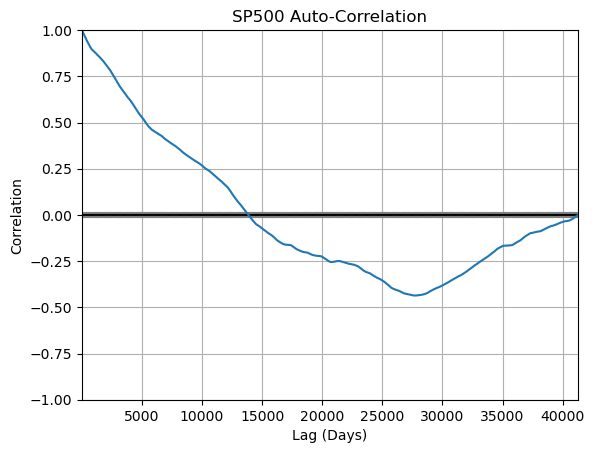

In [25]:
# plot an auto-correlation plot of the SP500
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(new_df['SP500'])
plt.xlabel('Lag (Days)')
plt.ylabel('Correlation')
plt.title('SP500 Auto-Correlation')
plt.show()

In [26]:


df["SP500"].describe()

count    41266.000000
mean      2421.537882
std         39.557135
min       2329.139900
25%       2390.860100
50%       2430.149900
75%       2448.820100
max       2490.649900
Name: SP500, dtype: float64

Text(0.5, 1.0, 'Boxplot of SP500')

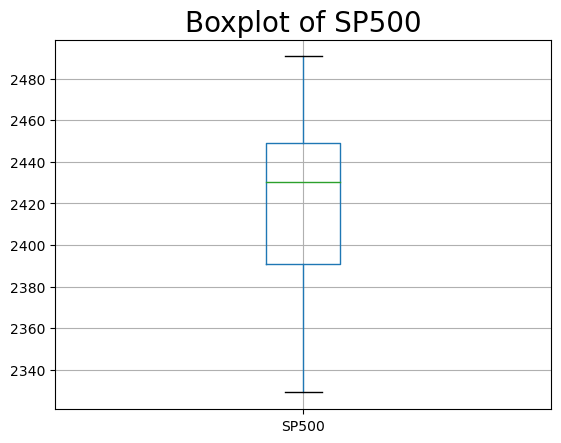

In [27]:

# Convert the Series to a DataFrame
df_box = df["SP500"].to_frame()

# Display boxplot of SP500 values
ax = df_box.boxplot()


ax.set_title('Boxplot of SP500', fontsize=20)

#### From the boxplot, we can get the following information. The max value of the SP500 is more than 2480 and the minimum is less than 2340. There are no outliers in the data. The median of the data is around 2430 and the 75th percentile is around 2448 and the 25th percentile is around 2390.



# Models

#### apply machine learning models and deep learning to predict SP500 column, i will use 
* SVR
* XGBRegressor
* RandomForestRegressor
* CNN
* LSTM

In [28]:
dataset=df[["Year","Month","Day","Hours","Minutes","Seconds","SP500"]]

In [29]:
dataset.head(3)

,Year,Month,Day,Hours,Minutes,Seconds,SP500
0,2017,4,3,13,30,0,2363.6101
1,2017,4,3,13,31,0,2364.1001
2,2017,4,3,13,32,0,2362.6799


In [30]:
X = dataset.drop(['SP500'],axis=1)
Y = dataset.SP500

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Support Vector Regression (SVR) model

In [36]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

SVR()

In [37]:
y_pred = regressor.predict(X_test)
# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 1671.1599414954949


# XGBRegressor

In [39]:
# Train the XGBRegressor model
regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [40]:
# Predict on the testing data and inverse scale the predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)

MSE: 1.3117209657754698


# RandomForestRegressor

In [42]:
# Train the RandomForestRegressor model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
# Predict on the testing data and inverse scale the predictions
y_pred = regressor.predict(X_test)
# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.17898025224507771


# CNN

In [50]:
#we first convert the input features x and target variable y to numpy arrays using the values attribute. Then we can reshape the data as needed for a CNN.
x = dataset.drop('SP500', axis=1).values
y = dataset['SP500'].values

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [52]:
# Reshape the data for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

In [53]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,1), activation='relu', input_shape=(X_train.shape[1], 1, 1)))
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Flatten())
model.add(Dense(units=1))

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
826/826 [==============================] - 11s 4ms/step - loss: 842256.7500 - val_loss: 2330.6863
Epoch 2/100
826/826 [==============================] - 4s 4ms/step - loss: 2172.7974 - val_loss: 1993.4784
Epoch 3/100
826/826 [==============================] - 3s 4ms/step - loss: 1866.7153 - val_loss: 1734.0529
Epoch 4/100
826/826 [==============================] - 3s 4ms/step - loss: 1605.0757 - val_loss: 1485.1949
Epoch 5/100
826/826 [==============================] - 4s 4ms/step - loss: 1457.1542 - val_loss: 1397.6088
Epoch 6/100
826/826 [==============================] - 4s 5ms/step - loss: 1423.8044 - val_loss: 1386.7596
Epoch 7/100
826/826 [==============================] - 3s 4ms/step - loss: 1406.1877 - val_loss: 1345.4919
Epoch 8/100
826/826 [==============================] - 3s 4ms/step - loss: 1363.1974 - val_loss: 1386.1162
Epoch 9/100
826/826 [==============================] - 3s 4ms/step - loss: 1325.5542 - val_loss: 1244.4171
Epoch 10/100
826/826 [============

In [55]:
# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using MSE
mse = mean_squared_error(y_test, y_pred)

print("MSE:", mse)

258/258 [==============================] - 1s 2ms/step
MSE: 236.78386601985773


# LSTM

In [58]:

# assuming your data is in a pandas DataFrame called `df`
X = dataset.drop('SP500', axis=1).values
y = dataset['SP500'].values

# reshape input data for LSTM
X = X.reshape((X.shape[0], 1, X.shape[1]))

# split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]





In [59]:
# create LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit the model to the training data
model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_test, y_test), verbose=2)

Epoch 1/50
459/459 - 6s - loss: 2215092.2500 - val_loss: 24823.1113 - 6s/epoch - 13ms/step
Epoch 2/50
459/459 - 3s - loss: 2637.4937 - val_loss: 2413.0159 - 3s/epoch - 6ms/step
Epoch 3/50
459/459 - 3s - loss: 1756.1803 - val_loss: 2329.4358 - 3s/epoch - 6ms/step
Epoch 4/50
459/459 - 3s - loss: 1728.6447 - val_loss: 2143.4128 - 3s/epoch - 6ms/step
Epoch 5/50
459/459 - 3s - loss: 1695.5647 - val_loss: 2243.1089 - 3s/epoch - 6ms/step
Epoch 6/50
459/459 - 3s - loss: 1655.6215 - val_loss: 2288.7029 - 3s/epoch - 6ms/step
Epoch 7/50
459/459 - 3s - loss: 1610.8632 - val_loss: 2188.9465 - 3s/epoch - 6ms/step
Epoch 8/50
459/459 - 3s - loss: 1562.5719 - val_loss: 2133.1543 - 3s/epoch - 6ms/step
Epoch 9/50
459/459 - 3s - loss: 1512.5681 - val_loss: 2077.2651 - 3s/epoch - 6ms/step
Epoch 10/50
459/459 - 3s - loss: 1461.7036 - val_loss: 2110.3193 - 3s/epoch - 6ms/step
Epoch 11/50
459/459 - 3s - loss: 1415.3474 - val_loss: 1851.9757 - 3s/epoch - 7ms/step
Epoch 12/50
459/459 - 3s - loss: 1372.6965 - va

In [60]:

# evaluate the model on the testing data
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: {:.2f}'.format(mse))

Mean Squared Error: 1273.95


## conclusion,the best model is RandomForestRegressor with MSE: 0.17898025224507771